# Data preprocessing

In [22]:
import warnings
warnings.filterwarnings("ignore")
import tools
import pandas as pd
from sklearn.cluster import KMeans

In [23]:
full_dataset = pd.read_csv('full_dataset.csv',sep=",")

we will try to explain :

Health outcomes related to PM2.5 between 2015 to 2017 :
- Asthma Emergency Department Visits
- Asthma Hospitalizations
- Deaths

Health outcomes related to O3 between 2015 to 2017
- Asthma Emergency Department Visits
- Respiratory and Cardiovascular Hospitalizations
- Deaths

As well as the concentration of those two particles, to understand which are the factors that impacts them.

we will concentrate on 2015-2017 data, since those are the years for which we have the most complete data.

In [24]:
columns = full_dataset.columns
for column in columns:
    print(column)

UHF42
Largest Property Use Type - Gross Floor Area (ft²)
Weather Normalized Site Natural Gas Intensity (therms/ft²)
Natural Gas Use (kBtu)
Weather Normalized Site Natural Gas Use (therms)
Total GHG Emissions (Metric Tons CO2e)
number of restaurants
parks superficy
poverty percentage
traffic volume
Borough
NO2 | Annual Average 2009
NO2 | Annual Average 2010
NO2 | Annual Average 2011
NO2 | Annual Average 2012
NO2 | Annual Average 2013
NO2 | Annual Average 2014
NO2 | Annual Average 2015
NO2 | Annual Average 2016
NO2 | Annual Average 2017
NO2 | Annual Average 2018
NO2 | Annual Average 2019
NO2 | Annual Average 2020
NO2 | Annual Average 2021
NO2 | Summer 2009
NO2 | Summer 2010
NO2 | Summer 2011
NO2 | Summer 2012
NO2 | Summer 2013
NO2 | Summer 2014
NO2 | Summer 2015
NO2 | Summer 2016
NO2 | Summer 2017
NO2 | Summer 2018
NO2 | Summer 2019
NO2 | Summer 2020
NO2 | Summer 2021
NO2 | Winter 2008-09
NO2 | Winter 2009-10
NO2 | Winter 2010-11
NO2 | Winter 2011-12
NO2 | Winter 2012-13
NO2 | Winter 201

In [25]:
selected_columns = [
    'UHF42',
    'Largest Property Use Type - Gross Floor Area (ft²)',
    'Weather Normalized Site Natural Gas Intensity (therms/ft²)',
    'Natural Gas Use (kBtu)',
    'Weather Normalized Site Natural Gas Use (therms)',
    'Total GHG Emissions (Metric Tons CO2e)',
    'number of restaurants',
    'parks superficy',
    'poverty percentage',
    'traffic volume',
    'Borough',
    'PM2.5 | Annual Average 2009',
    'PM2.5 | Annual Average 2010',
    'PM2.5 | Annual Average 2011',
    'PM2.5 | Annual Average 2012',
    'PM2.5 | Annual Average 2013',
    'PM2.5 | Annual Average 2014',
    'PM2.5 | Annual Average 2015',
    'PM2.5 | Annual Average 2016',
    'PM2.5 | Annual Average 2017',
    'O3 | Summer 2009',
    'O3 | Summer 2010',
    'O3 | Summer 2011',
    'O3 | Summer 2012',
    'O3 | Summer 2013',
    'O3 | Summer 2014',
    'O3 | Summer 2015',
    'O3 | Summer 2016',
    'O3 | Summer 2017',
    'PM2.5_AEDV | Estimated annual rate (under age 18) | 2015-2017',
    'PM2.5_AEDV | Estimated annual rate (age 18+) | 2015-2017',
    'PM2.5_CH | 2015-2017',
    'PM2.5_RH | 2015-2017',
    'PM2.5_D | 2015-2017',
    'O3_AEDV | Estimated annual rate (under age 18) | 2015-2017',
    'O3_AEDV | Estimated annual rate (age 18+) | 2015-2017',
    'O3_AH | Estimated annual rate (age 18+) | 2015-2017',
    'O3_AH | Estimated annual rate (under age 18) | 2015-2017',
    'O3_CRD | 2015-2017'
]

selected_df = full_dataset[selected_columns]

In [26]:
selected_df['O3 Particles Concentration'] = ( selected_df['O3 | Summer 2017'] + selected_df['O3 | Summer 2016'] + selected_df['O3 | Summer 2015'] ) / 3

In [27]:
selected_df['O3 Asthma Emergency Department Visits'] = ( selected_df['O3_AEDV | Estimated annual rate (under age 18) | 2015-2017'] + 
selected_df['O3_AEDV | Estimated annual rate (age 18+) | 2015-2017'] ) / 2

In [28]:
selected_df['O3 Attributable Hospitalizations'] = ( selected_df['O3_AH | Estimated annual rate (age 18+) | 2015-2017'] + selected_df['O3_AH | Estimated annual rate (under age 18) | 2015-2017'] ) / 2

In [29]:
selected_df['PM2.5 Particles Concentration'] = ( selected_df['PM2.5 | Annual Average 2015'] + selected_df['PM2.5 | Annual Average 2016'] + selected_df['PM2.5 | Annual Average 2017'] ) / 3

In [30]:
selected_df['PM2.5 Asthma Emergency Department Visits'] = (selected_df['PM2.5_AEDV | Estimated annual rate (under age 18) | 2015-2017'] + selected_df['PM2.5_AEDV | Estimated annual rate (age 18+) | 2015-2017']) / 2

In [31]:
selected_df['PM2.5 Attributable Hospitalizations'] = ( selected_df['PM2.5_CH | 2015-2017']+ selected_df['PM2.5_RH | 2015-2017'] ) / 2

In [32]:
columns_rename= {
 'PM2.5_D | 2015-2017': "PM2.5 Attributable Deaths",
  'O3_CRD | 2015-2017': "O3 Attributable Deaths"
}
selected_df.rename(columns=columns_rename, inplace=True)

In [33]:
selected_df.drop(columns=['O3 | Summer 2017', 
                          'O3 | Summer 2016',
                          'O3 | Summer 2015', 
                          'O3_AEDV | Estimated annual rate (under age 18) | 2015-2017',
                          'O3_AEDV | Estimated annual rate (age 18+) | 2015-2017',
                          'O3_AH | Estimated annual rate (age 18+) | 2015-2017',
                          'O3_AH | Estimated annual rate (under age 18) | 2015-2017',
                          'PM2.5 | Annual Average 2015', 
                          'PM2.5 | Annual Average 2016', 
                          'PM2.5 | Annual Average 2017', 
                          'PM2.5_AEDV | Estimated annual rate (under age 18) | 2015-2017',
                          'PM2.5_AEDV | Estimated annual rate (age 18+) | 2015-2017',
                          'PM2.5_CH | 2015-2017',
                          'PM2.5_RH | 2015-2017'], axis=1, inplace=True)

# Clustering :

## PM2.5 health outcomes:

In a first place, we will cluster all neighberhoods based on the PM2.5 health outcomes.

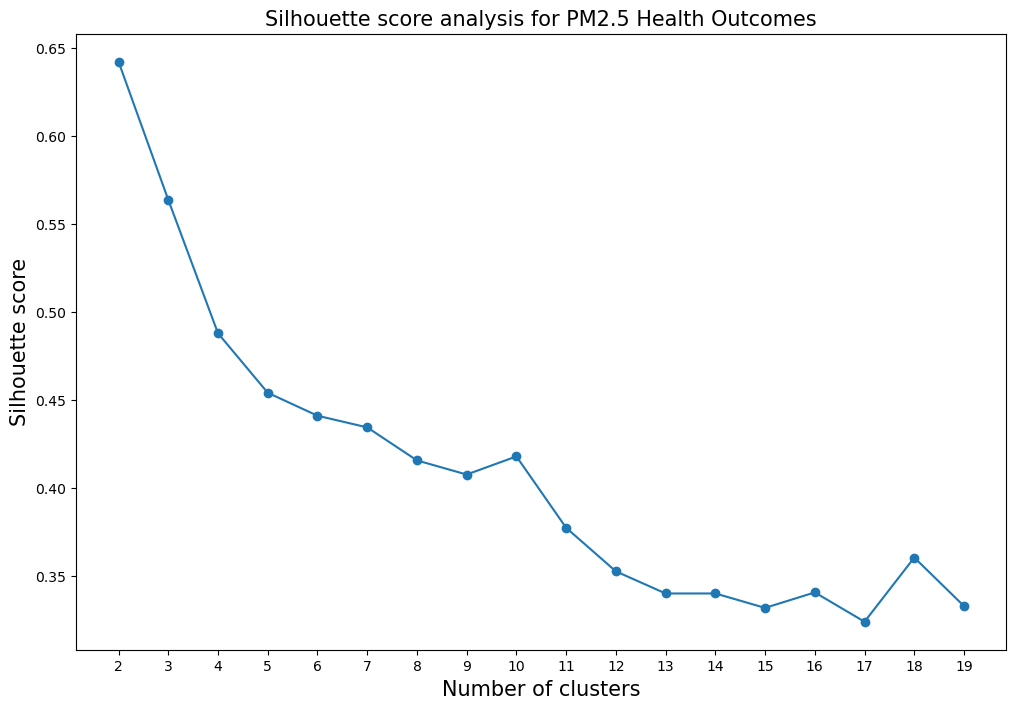

In [34]:
best_nb_cluster_pm2_5 = tools.clustering(
    selected_df,
    ['PM2.5 Attributable Deaths', 'PM2.5 Asthma Emergency Department Visits', 'PM2.5 Attributable Hospitalizations'],
    2,
    20,
    'Silhouette score analysis for PM2.5 Health Outcomes',
    1,
    True)

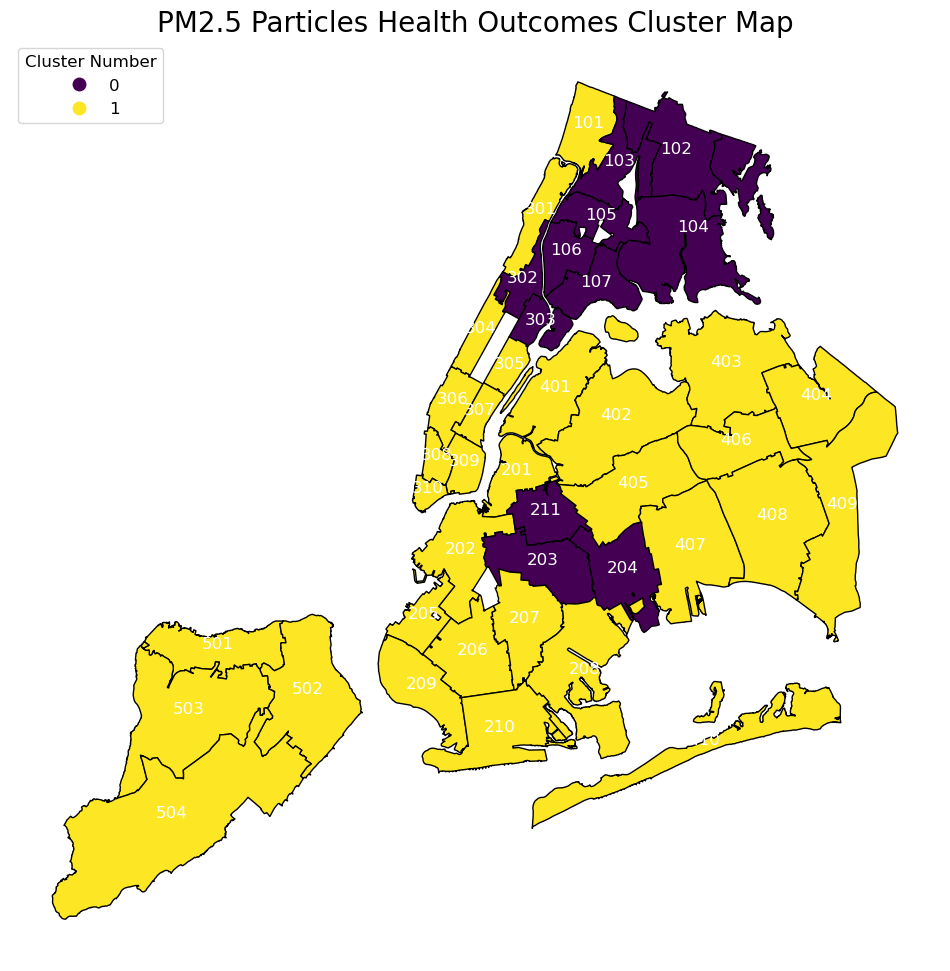

In [35]:
# clustering PM2.5 health outcomes
kmeans = KMeans(n_clusters = best_nb_cluster_pm2_5 )
cluster_labels_pm2_5 = kmeans.fit_predict(selected_df[['PM2.5 Attributable Deaths', 'PM2.5 Asthma Emergency Department Visits', 'PM2.5 Attributable Hospitalizations']])

# visualizing the clusters on map
tools.visualize_clusters_map(cluster_labels_pm2_5, 'PM2.5 Particles Health Outcomes Cluster Map')

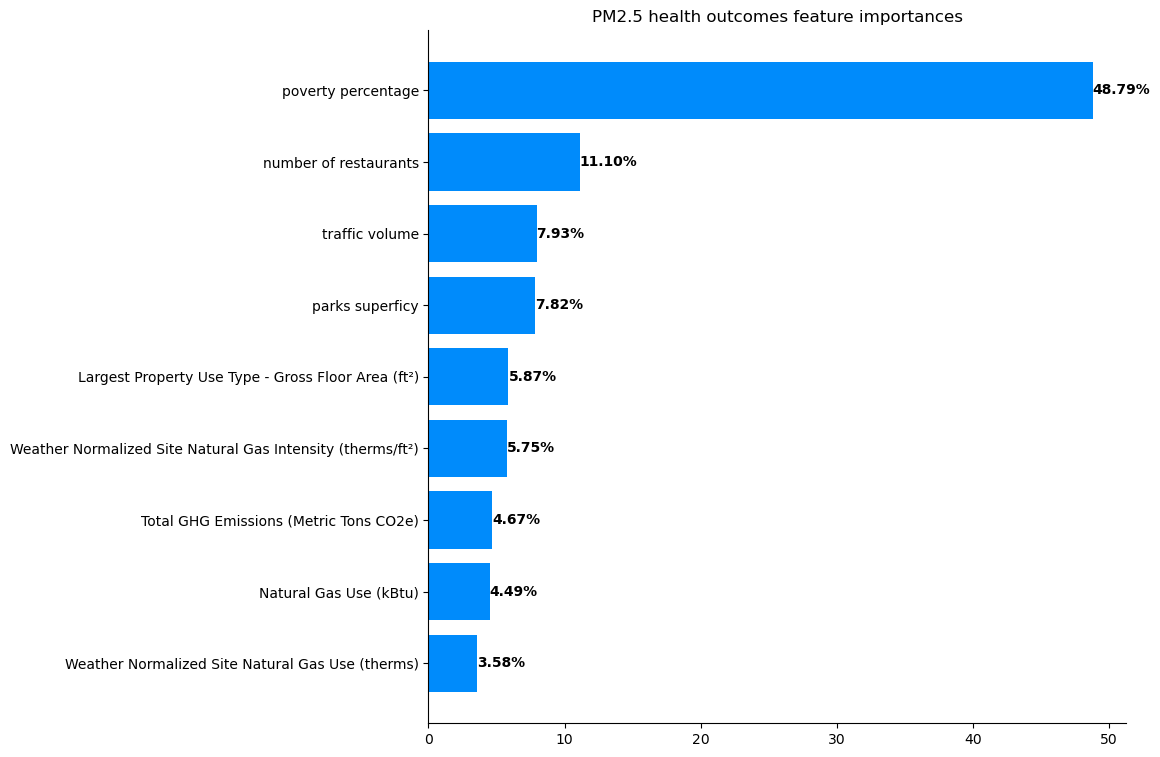

In [36]:
tools.feature_importance(
    selected_df, 
    ['Largest Property Use Type - Gross Floor Area (ft²)', 'Weather Normalized Site Natural Gas Intensity (therms/ft²)', 'Natural Gas Use (kBtu)', 'Weather Normalized Site Natural Gas Use (therms)', 'Total GHG Emissions (Metric Tons CO2e)', 'number of restaurants', 'parks superficy', 'poverty percentage', 'traffic volume'],
    cluster_labels_pm2_5,
    'PM2.5 health outcomes feature importances'
)

## O3 health outcomes :

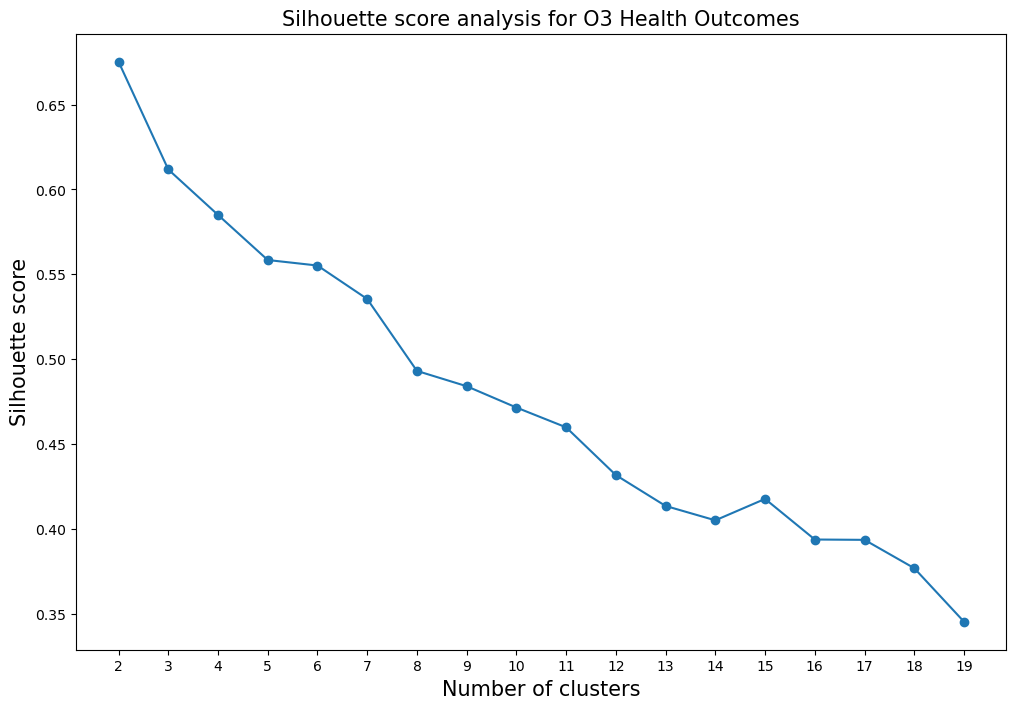

In [37]:
best_nb_cluster_o3 = tools.clustering(
    selected_df,
    ['O3 Attributable Deaths','O3 Particles Concentration', 'O3 Asthma Emergency Department Visits', 'O3 Attributable Hospitalizations'],
    2,
    20,
    'Silhouette score analysis for O3 Health Outcomes',
    1,
    True)

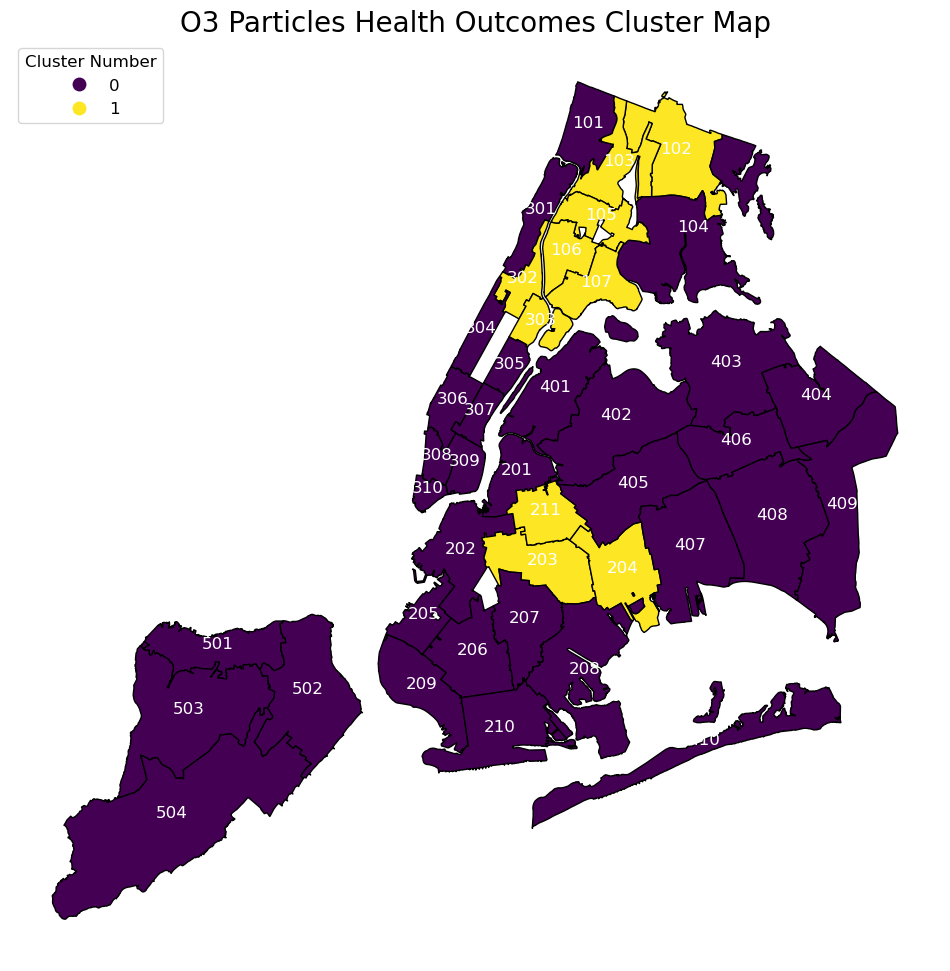

In [38]:
# clustering O3 health outcomes
kmeans = KMeans(n_clusters = best_nb_cluster_o3)
cluster_labels_o3 = kmeans.fit_predict(selected_df[['O3 Asthma Emergency Department Visits','O3 Attributable Hospitalizations','O3 Attributable Deaths']])

# visualizing the clusters on map
tools.visualize_clusters_map(cluster_labels_o3, 'O3 Particles Health Outcomes Cluster Map')

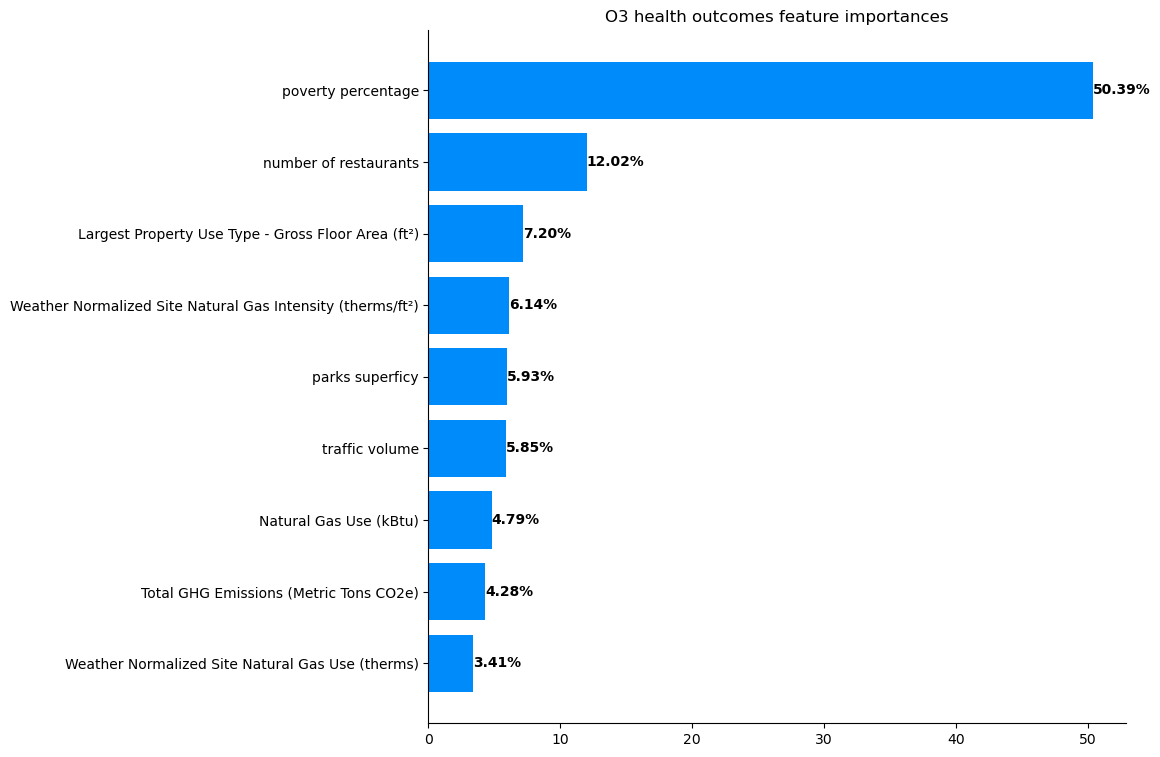

In [39]:
tools.feature_importance(
    selected_df, 
    ['Largest Property Use Type - Gross Floor Area (ft²)', 'Weather Normalized Site Natural Gas Intensity (therms/ft²)', 'Natural Gas Use (kBtu)', 'Weather Normalized Site Natural Gas Use (therms)', 'Total GHG Emissions (Metric Tons CO2e)', 'number of restaurants', 'parks superficy', 'poverty percentage', 'traffic volume'],
    cluster_labels_o3,
    'O3 health outcomes feature importances'
)